# 2-1.  Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 가져오기

### sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
### diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

<span style = "color:blue; font-size:100%"> 
<b>당뇨병 데이터를 가져 온다</span>

In [2]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()
type(diabetes)

sklearn.utils.Bunch

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

<span style = "color:blue; font-size:100%"> 
<b>'data' 컬럼의 데이터를 x, 'target' 컬럼의 데이터를 y 데이터로 할당한다.</span>

In [4]:
df_x = diabetes['data']
df_y = diabetes['target']

df_x.shape, df_y.shape

((442, 10), (442,))

In [5]:
type(df_x), type(df_y)

(numpy.ndarray, numpy.ndarray)

In [6]:
df_x = diabetes.data
df_y = diabetes.target

df_x.shape, df_y.shape

((442, 10), (442,))

In [7]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## 2) 모델에 입력할 데이터 X 준비하기

### df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

<span style = "color:blue; font-size:100%"> 
<b>'numpy array로 변환된것을 확인한다.</span>

In [8]:
type(df_x)

numpy.ndarray

## (3) 모델에 예측할 데이터 y 준비하기

### df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [9]:
type(df_x), type(df_y)

(numpy.ndarray, numpy.ndarray)

## 4. train 데이터와 test 데이터로 분리하기

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

In [12]:
df_x.shape, x_train.shape, x_test.shape

((442, 10), (353, 10), (89, 10))

## 5. 모델 준비하기

### 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
### 모델 함수를 구현해주세요.

<span style = "color:blue; font-size:100%"> 
<b>W와 b값을 초기화한다.</span>

In [13]:
W = np.random.rand(10)
b = np.random.rand()
W, b

(array([0.2496239 , 0.46968219, 0.36907528, 0.09424959, 0.10276151,
        0.45123926, 0.47275018, 0.19375757, 0.77873347, 0.3950034 ]),
 0.9872663963987854)

<span style = "color:blue; font-size:100%"> 
<b> 모델의 가설을 Multi Random variable Linear Regress으로 가정하고 가설 함수를 정의한다. </span>

In [14]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## 6. 손실함수 loss 정의하기

### 손실함수를 MSE 함수로 정의해주세요.

In [15]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [16]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## 7.기울기를 구하는 gradient 함수 구현하기

### 기울기를 계산하는 gradient 함수를 구현해주세요.

def gradient(x,w,b,y):
    delta = 0.0001
    dw = (loss(x, w+delta, b, y) - loss(x, w, b, y))/delta
    db = (loss(x, w, b+delta, y) - loss(x, w, b, y))/delta
    return dw, db

In [17]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## 8.하이퍼 파라미터인 학습률 설정하기

### 학습률, learning rate 를 설정해주세요
### 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [18]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.01

## 9. 모델 학습하기

### 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
### loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
### 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

<span style = "color:blue; font-size:100%"> 
<b> 경사하강법으로 손실함수의 W, b의 값을 구한다. </span>

In [19]:
dW, db = gradient(df_x, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.37236321 -0.31219443 -4.29135771 -3.22972774 -1.54701831 -1.26971918
  2.88970155 -3.1477607  -4.13895372 -2.79636465]
db: -302.29243553299426


<span style = "color:blue; font-size:100%"> 
<b> epoch = 200001  </span>

In [20]:
losses = []

for i in range(1, 200001):
    dW, db = gradient(x_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(x_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21636.7845
Iteration 20 : Loss 16450.4355
Iteration 30 : Loss 12985.3950
Iteration 40 : Loss 10669.5156
Iteration 50 : Loss 9120.8292
Iteration 60 : Loss 8084.3324
Iteration 70 : Loss 7389.7837
Iteration 80 : Loss 6923.5292
Iteration 90 : Loss 6609.6929
Iteration 100 : Loss 6397.6198
Iteration 110 : Loss 6253.4923
Iteration 120 : Loss 6154.7336
Iteration 130 : Loss 6086.2713
Iteration 140 : Loss 6038.0431
Iteration 150 : Loss 6003.3311
Iteration 160 : Loss 5977.6506
Iteration 170 : Loss 5958.0074
Iteration 180 : Loss 5942.4026
Iteration 190 : Loss 5929.5018
Iteration 200 : Loss 5918.4139
Iteration 210 : Loss 5908.5442
Iteration 220 : Loss 5899.4955
Iteration 230 : Loss 5891.0027
Iteration 240 : Loss 5882.8886
Iteration 250 : Loss 5875.0351
Iteration 260 : Loss 5867.3633
Iteration 270 : Loss 5859.8203
Iteration 280 : Loss 5852.3711
Iteration 290 : Loss 5844.9919
Iteration 300 : Loss 5837.6671
Iteration 310 : Loss 5830.3861
Iteration 320 : Loss 5823.1418
Iteration 330

Iteration 3750 : Loss 4286.5357
Iteration 3760 : Loss 4283.9179
Iteration 3770 : Loss 4281.3072
Iteration 3780 : Loss 4278.7035
Iteration 3790 : Loss 4276.1069
Iteration 3800 : Loss 4273.5173
Iteration 3810 : Loss 4270.9348
Iteration 3820 : Loss 4268.3592
Iteration 3830 : Loss 4265.7906
Iteration 3840 : Loss 4263.2290
Iteration 3850 : Loss 4260.6742
Iteration 3860 : Loss 4258.1264
Iteration 3870 : Loss 4255.5855
Iteration 3880 : Loss 4253.0514
Iteration 3890 : Loss 4250.5241
Iteration 3900 : Loss 4248.0036
Iteration 3910 : Loss 4245.4899
Iteration 3920 : Loss 4242.9830
Iteration 3930 : Loss 4240.4829
Iteration 3940 : Loss 4237.9894
Iteration 3950 : Loss 4235.5027
Iteration 3960 : Loss 4233.0226
Iteration 3970 : Loss 4230.5492
Iteration 3980 : Loss 4228.0824
Iteration 3990 : Loss 4225.6223
Iteration 4000 : Loss 4223.1687
Iteration 4010 : Loss 4220.7217
Iteration 4020 : Loss 4218.2812
Iteration 4030 : Loss 4215.8473
Iteration 4040 : Loss 4213.4199
Iteration 4050 : Loss 4210.9989
Iteratio

Iteration 7230 : Loss 3681.7558
Iteration 7240 : Loss 3680.6358
Iteration 7250 : Loss 3679.5181
Iteration 7260 : Loss 3678.4029
Iteration 7270 : Loss 3677.2900
Iteration 7280 : Loss 3676.1795
Iteration 7290 : Loss 3675.0714
Iteration 7300 : Loss 3673.9657
Iteration 7310 : Loss 3672.8623
Iteration 7320 : Loss 3671.7613
Iteration 7330 : Loss 3670.6627
Iteration 7340 : Loss 3669.5664
Iteration 7350 : Loss 3668.4724
Iteration 7360 : Loss 3667.3808
Iteration 7370 : Loss 3666.2914
Iteration 7380 : Loss 3665.2044
Iteration 7390 : Loss 3664.1197
Iteration 7400 : Loss 3663.0374
Iteration 7410 : Loss 3661.9573
Iteration 7420 : Loss 3660.8795
Iteration 7430 : Loss 3659.8039
Iteration 7440 : Loss 3658.7307
Iteration 7450 : Loss 3657.6597
Iteration 7460 : Loss 3656.5910
Iteration 7470 : Loss 3655.5246
Iteration 7480 : Loss 3654.4604
Iteration 7490 : Loss 3653.3984
Iteration 7500 : Loss 3652.3387
Iteration 7510 : Loss 3651.2812
Iteration 7520 : Loss 3650.2259
Iteration 7530 : Loss 3649.1729
Iteratio

Iteration 10070 : Loss 3439.0362
Iteration 10080 : Loss 3438.3882
Iteration 10090 : Loss 3437.7412
Iteration 10100 : Loss 3437.0954
Iteration 10110 : Loss 3436.4506
Iteration 10120 : Loss 3435.8070
Iteration 10130 : Loss 3435.1645
Iteration 10140 : Loss 3434.5230
Iteration 10150 : Loss 3433.8827
Iteration 10160 : Loss 3433.2434
Iteration 10170 : Loss 3432.6053
Iteration 10180 : Loss 3431.9682
Iteration 10190 : Loss 3431.3322
Iteration 10200 : Loss 3430.6973
Iteration 10210 : Loss 3430.0635
Iteration 10220 : Loss 3429.4307
Iteration 10230 : Loss 3428.7990
Iteration 10240 : Loss 3428.1684
Iteration 10250 : Loss 3427.5388
Iteration 10260 : Loss 3426.9104
Iteration 10270 : Loss 3426.2829
Iteration 10280 : Loss 3425.6566
Iteration 10290 : Loss 3425.0313
Iteration 10300 : Loss 3424.4070
Iteration 10310 : Loss 3423.7838
Iteration 10320 : Loss 3423.1617
Iteration 10330 : Loss 3422.5406
Iteration 10340 : Loss 3421.9205
Iteration 10350 : Loss 3421.3015
Iteration 10360 : Loss 3420.6835
Iteration 

Iteration 12600 : Loss 3304.3136
Iteration 12610 : Loss 3303.8770
Iteration 12620 : Loss 3303.4411
Iteration 12630 : Loss 3303.0057
Iteration 12640 : Loss 3302.5710
Iteration 12650 : Loss 3302.1369
Iteration 12660 : Loss 3301.7034
Iteration 12670 : Loss 3301.2706
Iteration 12680 : Loss 3300.8383
Iteration 12690 : Loss 3300.4067
Iteration 12700 : Loss 3299.9757
Iteration 12710 : Loss 3299.5452
Iteration 12720 : Loss 3299.1154
Iteration 12730 : Loss 3298.6862
Iteration 12740 : Loss 3298.2576
Iteration 12750 : Loss 3297.8296
Iteration 12760 : Loss 3297.4022
Iteration 12770 : Loss 3296.9754
Iteration 12780 : Loss 3296.5492
Iteration 12790 : Loss 3296.1236
Iteration 12800 : Loss 3295.6986
Iteration 12810 : Loss 3295.2742
Iteration 12820 : Loss 3294.8504
Iteration 12830 : Loss 3294.4272
Iteration 12840 : Loss 3294.0046
Iteration 12850 : Loss 3293.5826
Iteration 12860 : Loss 3293.1612
Iteration 12870 : Loss 3292.7403
Iteration 12880 : Loss 3292.3201
Iteration 12890 : Loss 3291.9004
Iteration 

Iteration 16050 : Loss 3183.4773
Iteration 16060 : Loss 3183.1973
Iteration 16070 : Loss 3182.9177
Iteration 16080 : Loss 3182.6384
Iteration 16090 : Loss 3182.3594
Iteration 16100 : Loss 3182.0807
Iteration 16110 : Loss 3181.8024
Iteration 16120 : Loss 3181.5244
Iteration 16130 : Loss 3181.2467
Iteration 16140 : Loss 3180.9693
Iteration 16150 : Loss 3180.6923
Iteration 16160 : Loss 3180.4156
Iteration 16170 : Loss 3180.1392
Iteration 16180 : Loss 3179.8631
Iteration 16190 : Loss 3179.5874
Iteration 16200 : Loss 3179.3120
Iteration 16210 : Loss 3179.0369
Iteration 16220 : Loss 3178.7621
Iteration 16230 : Loss 3178.4877
Iteration 16240 : Loss 3178.2135
Iteration 16250 : Loss 3177.9397
Iteration 16260 : Loss 3177.6662
Iteration 16270 : Loss 3177.3931
Iteration 16280 : Loss 3177.1202
Iteration 16290 : Loss 3176.8477
Iteration 16300 : Loss 3176.5755
Iteration 16310 : Loss 3176.3036
Iteration 16320 : Loss 3176.0320
Iteration 16330 : Loss 3175.7607
Iteration 16340 : Loss 3175.4898
Iteration 

Iteration 19590 : Loss 3101.7288
Iteration 19600 : Loss 3101.5395
Iteration 19610 : Loss 3101.3505
Iteration 19620 : Loss 3101.1616
Iteration 19630 : Loss 3100.9729
Iteration 19640 : Loss 3100.7845
Iteration 19650 : Loss 3100.5962
Iteration 19660 : Loss 3100.4081
Iteration 19670 : Loss 3100.2203
Iteration 19680 : Loss 3100.0326
Iteration 19690 : Loss 3099.8451
Iteration 19700 : Loss 3099.6578
Iteration 19710 : Loss 3099.4707
Iteration 19720 : Loss 3099.2838
Iteration 19730 : Loss 3099.0971
Iteration 19740 : Loss 3098.9106
Iteration 19750 : Loss 3098.7243
Iteration 19760 : Loss 3098.5382
Iteration 19770 : Loss 3098.3523
Iteration 19780 : Loss 3098.1666
Iteration 19790 : Loss 3097.9810
Iteration 19800 : Loss 3097.7957
Iteration 19810 : Loss 3097.6105
Iteration 19820 : Loss 3097.4256
Iteration 19830 : Loss 3097.2408
Iteration 19840 : Loss 3097.0563
Iteration 19850 : Loss 3096.8719
Iteration 19860 : Loss 3096.6877
Iteration 19870 : Loss 3096.5037
Iteration 19880 : Loss 3096.3199
Iteration 

Iteration 23130 : Loss 3045.5154
Iteration 23140 : Loss 3045.3832
Iteration 23150 : Loss 3045.2511
Iteration 23160 : Loss 3045.1192
Iteration 23170 : Loss 3044.9874
Iteration 23180 : Loss 3044.8558
Iteration 23190 : Loss 3044.7242
Iteration 23200 : Loss 3044.5928
Iteration 23210 : Loss 3044.4616
Iteration 23220 : Loss 3044.3304
Iteration 23230 : Loss 3044.1994
Iteration 23240 : Loss 3044.0685
Iteration 23250 : Loss 3043.9378
Iteration 23260 : Loss 3043.8072
Iteration 23270 : Loss 3043.6767
Iteration 23280 : Loss 3043.5463
Iteration 23290 : Loss 3043.4161
Iteration 23300 : Loss 3043.2859
Iteration 23310 : Loss 3043.1560
Iteration 23320 : Loss 3043.0261
Iteration 23330 : Loss 3042.8964
Iteration 23340 : Loss 3042.7668
Iteration 23350 : Loss 3042.6373
Iteration 23360 : Loss 3042.5079
Iteration 23370 : Loss 3042.3787
Iteration 23380 : Loss 3042.2496
Iteration 23390 : Loss 3042.1207
Iteration 23400 : Loss 3041.9918
Iteration 23410 : Loss 3041.8631
Iteration 23420 : Loss 3041.7345
Iteration 

Iteration 26360 : Loss 3008.8608
Iteration 26370 : Loss 3008.7641
Iteration 26380 : Loss 3008.6674
Iteration 26390 : Loss 3008.5709
Iteration 26400 : Loss 3008.4744
Iteration 26410 : Loss 3008.3781
Iteration 26420 : Loss 3008.2818
Iteration 26430 : Loss 3008.1856
Iteration 26440 : Loss 3008.0895
Iteration 26450 : Loss 3007.9935
Iteration 26460 : Loss 3007.8976
Iteration 26470 : Loss 3007.8018
Iteration 26480 : Loss 3007.7061
Iteration 26490 : Loss 3007.6105
Iteration 26500 : Loss 3007.5149
Iteration 26510 : Loss 3007.4195
Iteration 26520 : Loss 3007.3241
Iteration 26530 : Loss 3007.2289
Iteration 26540 : Loss 3007.1337
Iteration 26550 : Loss 3007.0386
Iteration 26560 : Loss 3006.9436
Iteration 26570 : Loss 3006.8487
Iteration 26580 : Loss 3006.7539
Iteration 26590 : Loss 3006.6591
Iteration 26600 : Loss 3006.5645
Iteration 26610 : Loss 3006.4700
Iteration 26620 : Loss 3006.3755
Iteration 26630 : Loss 3006.2811
Iteration 26640 : Loss 3006.1868
Iteration 26650 : Loss 3006.0927
Iteration 

Iteration 29640 : Loss 2981.5546
Iteration 29650 : Loss 2981.4835
Iteration 29660 : Loss 2981.4125
Iteration 29670 : Loss 2981.3415
Iteration 29680 : Loss 2981.2706
Iteration 29690 : Loss 2981.1997
Iteration 29700 : Loss 2981.1289
Iteration 29710 : Loss 2981.0582
Iteration 29720 : Loss 2980.9875
Iteration 29730 : Loss 2980.9169
Iteration 29740 : Loss 2980.8464
Iteration 29750 : Loss 2980.7759
Iteration 29760 : Loss 2980.7055
Iteration 29770 : Loss 2980.6352
Iteration 29780 : Loss 2980.5649
Iteration 29790 : Loss 2980.4947
Iteration 29800 : Loss 2980.4246
Iteration 29810 : Loss 2980.3545
Iteration 29820 : Loss 2980.2845
Iteration 29830 : Loss 2980.2146
Iteration 29840 : Loss 2980.1447
Iteration 29850 : Loss 2980.0749
Iteration 29860 : Loss 2980.0051
Iteration 29870 : Loss 2979.9354
Iteration 29880 : Loss 2979.8658
Iteration 29890 : Loss 2979.7962
Iteration 29900 : Loss 2979.7267
Iteration 29910 : Loss 2979.6573
Iteration 29920 : Loss 2979.5880
Iteration 29930 : Loss 2979.5186
Iteration 

Iteration 32130 : Loss 2965.7210
Iteration 32140 : Loss 2965.6644
Iteration 32150 : Loss 2965.6078
Iteration 32160 : Loss 2965.5514
Iteration 32170 : Loss 2965.4949
Iteration 32180 : Loss 2965.4385
Iteration 32190 : Loss 2965.3822
Iteration 32200 : Loss 2965.3259
Iteration 32210 : Loss 2965.2697
Iteration 32220 : Loss 2965.2135
Iteration 32230 : Loss 2965.1573
Iteration 32240 : Loss 2965.1013
Iteration 32250 : Loss 2965.0452
Iteration 32260 : Loss 2964.9892
Iteration 32270 : Loss 2964.9333
Iteration 32280 : Loss 2964.8774
Iteration 32290 : Loss 2964.8216
Iteration 32300 : Loss 2964.7658
Iteration 32310 : Loss 2964.7101
Iteration 32320 : Loss 2964.6544
Iteration 32330 : Loss 2964.5988
Iteration 32340 : Loss 2964.5432
Iteration 32350 : Loss 2964.4877
Iteration 32360 : Loss 2964.4322
Iteration 32370 : Loss 2964.3768
Iteration 32380 : Loss 2964.3214
Iteration 32390 : Loss 2964.2661
Iteration 32400 : Loss 2964.2108
Iteration 32410 : Loss 2964.1556
Iteration 32420 : Loss 2964.1004
Iteration 

Iteration 35720 : Loss 2948.3580
Iteration 35730 : Loss 2948.3170
Iteration 35740 : Loss 2948.2760
Iteration 35750 : Loss 2948.2351
Iteration 35760 : Loss 2948.1942
Iteration 35770 : Loss 2948.1534
Iteration 35780 : Loss 2948.1126
Iteration 35790 : Loss 2948.0718
Iteration 35800 : Loss 2948.0311
Iteration 35810 : Loss 2947.9904
Iteration 35820 : Loss 2947.9497
Iteration 35830 : Loss 2947.9091
Iteration 35840 : Loss 2947.8685
Iteration 35850 : Loss 2947.8279
Iteration 35860 : Loss 2947.7874
Iteration 35870 : Loss 2947.7469
Iteration 35880 : Loss 2947.7065
Iteration 35890 : Loss 2947.6661
Iteration 35900 : Loss 2947.6257
Iteration 35910 : Loss 2947.5853
Iteration 35920 : Loss 2947.5450
Iteration 35930 : Loss 2947.5048
Iteration 35940 : Loss 2947.4645
Iteration 35950 : Loss 2947.4243
Iteration 35960 : Loss 2947.3842
Iteration 35970 : Loss 2947.3440
Iteration 35980 : Loss 2947.3039
Iteration 35990 : Loss 2947.2639
Iteration 36000 : Loss 2947.2239
Iteration 36010 : Loss 2947.1839
Iteration 

Iteration 39360 : Loss 2935.5870
Iteration 39370 : Loss 2935.5572
Iteration 39380 : Loss 2935.5274
Iteration 39390 : Loss 2935.4977
Iteration 39400 : Loss 2935.4680
Iteration 39410 : Loss 2935.4383
Iteration 39420 : Loss 2935.4086
Iteration 39430 : Loss 2935.3790
Iteration 39440 : Loss 2935.3494
Iteration 39450 : Loss 2935.3198
Iteration 39460 : Loss 2935.2902
Iteration 39470 : Loss 2935.2607
Iteration 39480 : Loss 2935.2312
Iteration 39490 : Loss 2935.2017
Iteration 39500 : Loss 2935.1723
Iteration 39510 : Loss 2935.1428
Iteration 39520 : Loss 2935.1134
Iteration 39530 : Loss 2935.0841
Iteration 39540 : Loss 2935.0547
Iteration 39550 : Loss 2935.0254
Iteration 39560 : Loss 2934.9961
Iteration 39570 : Loss 2934.9668
Iteration 39580 : Loss 2934.9375
Iteration 39590 : Loss 2934.9083
Iteration 39600 : Loss 2934.8791
Iteration 39610 : Loss 2934.8499
Iteration 39620 : Loss 2934.8208
Iteration 39630 : Loss 2934.7917
Iteration 39640 : Loss 2934.7626
Iteration 39650 : Loss 2934.7335
Iteration 

Iteration 41880 : Loss 2928.8359
Iteration 41890 : Loss 2928.8119
Iteration 41900 : Loss 2928.7879
Iteration 41910 : Loss 2928.7640
Iteration 41920 : Loss 2928.7401
Iteration 41930 : Loss 2928.7162
Iteration 41940 : Loss 2928.6923
Iteration 41950 : Loss 2928.6684
Iteration 41960 : Loss 2928.6445
Iteration 41970 : Loss 2928.6207
Iteration 41980 : Loss 2928.5969
Iteration 41990 : Loss 2928.5731
Iteration 42000 : Loss 2928.5493
Iteration 42010 : Loss 2928.5256
Iteration 42020 : Loss 2928.5019
Iteration 42030 : Loss 2928.4781
Iteration 42040 : Loss 2928.4545
Iteration 42050 : Loss 2928.4308
Iteration 42060 : Loss 2928.4071
Iteration 42070 : Loss 2928.3835
Iteration 42080 : Loss 2928.3599
Iteration 42090 : Loss 2928.3363
Iteration 42100 : Loss 2928.3127
Iteration 42110 : Loss 2928.2892
Iteration 42120 : Loss 2928.2657
Iteration 42130 : Loss 2928.2422
Iteration 42140 : Loss 2928.2187
Iteration 42150 : Loss 2928.1952
Iteration 42160 : Loss 2928.1717
Iteration 42170 : Loss 2928.1483
Iteration 

Iteration 44710 : Loss 2922.7944
Iteration 44720 : Loss 2922.7755
Iteration 44730 : Loss 2922.7566
Iteration 44740 : Loss 2922.7377
Iteration 44750 : Loss 2922.7188
Iteration 44760 : Loss 2922.7000
Iteration 44770 : Loss 2922.6812
Iteration 44780 : Loss 2922.6624
Iteration 44790 : Loss 2922.6436
Iteration 44800 : Loss 2922.6248
Iteration 44810 : Loss 2922.6060
Iteration 44820 : Loss 2922.5873
Iteration 44830 : Loss 2922.5685
Iteration 44840 : Loss 2922.5498
Iteration 44850 : Loss 2922.5311
Iteration 44860 : Loss 2922.5124
Iteration 44870 : Loss 2922.4938
Iteration 44880 : Loss 2922.4751
Iteration 44890 : Loss 2922.4565
Iteration 44900 : Loss 2922.4379
Iteration 44910 : Loss 2922.4192
Iteration 44920 : Loss 2922.4007
Iteration 44930 : Loss 2922.3821
Iteration 44940 : Loss 2922.3635
Iteration 44950 : Loss 2922.3450
Iteration 44960 : Loss 2922.3264
Iteration 44970 : Loss 2922.3079
Iteration 44980 : Loss 2922.2894
Iteration 44990 : Loss 2922.2709
Iteration 45000 : Loss 2922.2525
Iteration 

Iteration 48100 : Loss 2917.2031
Iteration 48110 : Loss 2917.1888
Iteration 48120 : Loss 2917.1745
Iteration 48130 : Loss 2917.1603
Iteration 48140 : Loss 2917.1460
Iteration 48150 : Loss 2917.1317
Iteration 48160 : Loss 2917.1175
Iteration 48170 : Loss 2917.1033
Iteration 48180 : Loss 2917.0890
Iteration 48190 : Loss 2917.0748
Iteration 48200 : Loss 2917.0606
Iteration 48210 : Loss 2917.0464
Iteration 48220 : Loss 2917.0323
Iteration 48230 : Loss 2917.0181
Iteration 48240 : Loss 2917.0040
Iteration 48250 : Loss 2916.9898
Iteration 48260 : Loss 2916.9757
Iteration 48270 : Loss 2916.9616
Iteration 48280 : Loss 2916.9475
Iteration 48290 : Loss 2916.9334
Iteration 48300 : Loss 2916.9193
Iteration 48310 : Loss 2916.9052
Iteration 48320 : Loss 2916.8912
Iteration 48330 : Loss 2916.8771
Iteration 48340 : Loss 2916.8631
Iteration 48350 : Loss 2916.8490
Iteration 48360 : Loss 2916.8350
Iteration 48370 : Loss 2916.8210
Iteration 48380 : Loss 2916.8070
Iteration 48390 : Loss 2916.7930
Iteration 

Iteration 50780 : Loss 2913.7547
Iteration 50790 : Loss 2913.7432
Iteration 50800 : Loss 2913.7317
Iteration 50810 : Loss 2913.7202
Iteration 50820 : Loss 2913.7087
Iteration 50830 : Loss 2913.6972
Iteration 50840 : Loss 2913.6857
Iteration 50850 : Loss 2913.6742
Iteration 50860 : Loss 2913.6627
Iteration 50870 : Loss 2913.6513
Iteration 50880 : Loss 2913.6398
Iteration 50890 : Loss 2913.6284
Iteration 50900 : Loss 2913.6170
Iteration 50910 : Loss 2913.6055
Iteration 50920 : Loss 2913.5941
Iteration 50930 : Loss 2913.5827
Iteration 50940 : Loss 2913.5713
Iteration 50950 : Loss 2913.5599
Iteration 50960 : Loss 2913.5486
Iteration 50970 : Loss 2913.5372
Iteration 50980 : Loss 2913.5258
Iteration 50990 : Loss 2913.5145
Iteration 51000 : Loss 2913.5031
Iteration 51010 : Loss 2913.4918
Iteration 51020 : Loss 2913.4805
Iteration 51030 : Loss 2913.4692
Iteration 51040 : Loss 2913.4579
Iteration 51050 : Loss 2913.4466
Iteration 51060 : Loss 2913.4353
Iteration 51070 : Loss 2913.4240
Iteration 

Iteration 54210 : Loss 2910.2872
Iteration 54220 : Loss 2910.2784
Iteration 54230 : Loss 2910.2696
Iteration 54240 : Loss 2910.2608
Iteration 54250 : Loss 2910.2520
Iteration 54260 : Loss 2910.2432
Iteration 54270 : Loss 2910.2344
Iteration 54280 : Loss 2910.2256
Iteration 54290 : Loss 2910.2169
Iteration 54300 : Loss 2910.2081
Iteration 54310 : Loss 2910.1994
Iteration 54320 : Loss 2910.1906
Iteration 54330 : Loss 2910.1819
Iteration 54340 : Loss 2910.1731
Iteration 54350 : Loss 2910.1644
Iteration 54360 : Loss 2910.1557
Iteration 54370 : Loss 2910.1470
Iteration 54380 : Loss 2910.1383
Iteration 54390 : Loss 2910.1296
Iteration 54400 : Loss 2910.1209
Iteration 54410 : Loss 2910.1122
Iteration 54420 : Loss 2910.1035
Iteration 54430 : Loss 2910.0948
Iteration 54440 : Loss 2910.0862
Iteration 54450 : Loss 2910.0775
Iteration 54460 : Loss 2910.0689
Iteration 54470 : Loss 2910.0602
Iteration 54480 : Loss 2910.0516
Iteration 54490 : Loss 2910.0429
Iteration 54500 : Loss 2910.0343
Iteration 

Iteration 57790 : Loss 2907.5251
Iteration 57800 : Loss 2907.5184
Iteration 57810 : Loss 2907.5117
Iteration 57820 : Loss 2907.5050
Iteration 57830 : Loss 2907.4983
Iteration 57840 : Loss 2907.4916
Iteration 57850 : Loss 2907.4849
Iteration 57860 : Loss 2907.4782
Iteration 57870 : Loss 2907.4715
Iteration 57880 : Loss 2907.4648
Iteration 57890 : Loss 2907.4582
Iteration 57900 : Loss 2907.4515
Iteration 57910 : Loss 2907.4448
Iteration 57920 : Loss 2907.4382
Iteration 57930 : Loss 2907.4315
Iteration 57940 : Loss 2907.4249
Iteration 57950 : Loss 2907.4182
Iteration 57960 : Loss 2907.4116
Iteration 57970 : Loss 2907.4050
Iteration 57980 : Loss 2907.3983
Iteration 57990 : Loss 2907.3917
Iteration 58000 : Loss 2907.3851
Iteration 58010 : Loss 2907.3785
Iteration 58020 : Loss 2907.3719
Iteration 58030 : Loss 2907.3653
Iteration 58040 : Loss 2907.3587
Iteration 58050 : Loss 2907.3521
Iteration 58060 : Loss 2907.3455
Iteration 58070 : Loss 2907.3389
Iteration 58080 : Loss 2907.3323
Iteration 

Iteration 61220 : Loss 2905.4892
Iteration 61230 : Loss 2905.4840
Iteration 61240 : Loss 2905.4787
Iteration 61250 : Loss 2905.4735
Iteration 61260 : Loss 2905.4683
Iteration 61270 : Loss 2905.4631
Iteration 61280 : Loss 2905.4579
Iteration 61290 : Loss 2905.4527
Iteration 61300 : Loss 2905.4475
Iteration 61310 : Loss 2905.4423
Iteration 61320 : Loss 2905.4371
Iteration 61330 : Loss 2905.4320
Iteration 61340 : Loss 2905.4268
Iteration 61350 : Loss 2905.4216
Iteration 61360 : Loss 2905.4164
Iteration 61370 : Loss 2905.4113
Iteration 61380 : Loss 2905.4061
Iteration 61390 : Loss 2905.4009
Iteration 61400 : Loss 2905.3958
Iteration 61410 : Loss 2905.3906
Iteration 61420 : Loss 2905.3855
Iteration 61430 : Loss 2905.3803
Iteration 61440 : Loss 2905.3752
Iteration 61450 : Loss 2905.3700
Iteration 61460 : Loss 2905.3649
Iteration 61470 : Loss 2905.3598
Iteration 61480 : Loss 2905.3546
Iteration 61490 : Loss 2905.3495
Iteration 61500 : Loss 2905.3444
Iteration 61510 : Loss 2905.3393
Iteration 

Iteration 64720 : Loss 2903.8713
Iteration 64730 : Loss 2903.8672
Iteration 64740 : Loss 2903.8632
Iteration 64750 : Loss 2903.8591
Iteration 64760 : Loss 2903.8550
Iteration 64770 : Loss 2903.8510
Iteration 64780 : Loss 2903.8469
Iteration 64790 : Loss 2903.8429
Iteration 64800 : Loss 2903.8388
Iteration 64810 : Loss 2903.8347
Iteration 64820 : Loss 2903.8307
Iteration 64830 : Loss 2903.8267
Iteration 64840 : Loss 2903.8226
Iteration 64850 : Loss 2903.8186
Iteration 64860 : Loss 2903.8145
Iteration 64870 : Loss 2903.8105
Iteration 64880 : Loss 2903.8065
Iteration 64890 : Loss 2903.8024
Iteration 64900 : Loss 2903.7984
Iteration 64910 : Loss 2903.7944
Iteration 64920 : Loss 2903.7904
Iteration 64930 : Loss 2903.7863
Iteration 64940 : Loss 2903.7823
Iteration 64950 : Loss 2903.7783
Iteration 64960 : Loss 2903.7743
Iteration 64970 : Loss 2903.7703
Iteration 64980 : Loss 2903.7663
Iteration 64990 : Loss 2903.7623
Iteration 65000 : Loss 2903.7583
Iteration 65010 : Loss 2903.7543
Iteration 

Iteration 68400 : Loss 2902.5456
Iteration 68410 : Loss 2902.5424
Iteration 68420 : Loss 2902.5392
Iteration 68430 : Loss 2902.5361
Iteration 68440 : Loss 2902.5329
Iteration 68450 : Loss 2902.5297
Iteration 68460 : Loss 2902.5266
Iteration 68470 : Loss 2902.5234
Iteration 68480 : Loss 2902.5203
Iteration 68490 : Loss 2902.5171
Iteration 68500 : Loss 2902.5139
Iteration 68510 : Loss 2902.5108
Iteration 68520 : Loss 2902.5076
Iteration 68530 : Loss 2902.5045
Iteration 68540 : Loss 2902.5014
Iteration 68550 : Loss 2902.4982
Iteration 68560 : Loss 2902.4951
Iteration 68570 : Loss 2902.4919
Iteration 68580 : Loss 2902.4888
Iteration 68590 : Loss 2902.4857
Iteration 68600 : Loss 2902.4825
Iteration 68610 : Loss 2902.4794
Iteration 68620 : Loss 2902.4763
Iteration 68630 : Loss 2902.4731
Iteration 68640 : Loss 2902.4700
Iteration 68650 : Loss 2902.4669
Iteration 68660 : Loss 2902.4638
Iteration 68670 : Loss 2902.4607
Iteration 68680 : Loss 2902.4575
Iteration 68690 : Loss 2902.4544
Iteration 

Iteration 71810 : Loss 2901.5762
Iteration 71820 : Loss 2901.5736
Iteration 71830 : Loss 2901.5711
Iteration 71840 : Loss 2901.5685
Iteration 71850 : Loss 2901.5660
Iteration 71860 : Loss 2901.5635
Iteration 71870 : Loss 2901.5609
Iteration 71880 : Loss 2901.5584
Iteration 71890 : Loss 2901.5559
Iteration 71900 : Loss 2901.5534
Iteration 71910 : Loss 2901.5508
Iteration 71920 : Loss 2901.5483
Iteration 71930 : Loss 2901.5458
Iteration 71940 : Loss 2901.5433
Iteration 71950 : Loss 2901.5407
Iteration 71960 : Loss 2901.5382
Iteration 71970 : Loss 2901.5357
Iteration 71980 : Loss 2901.5332
Iteration 71990 : Loss 2901.5307
Iteration 72000 : Loss 2901.5282
Iteration 72010 : Loss 2901.5257
Iteration 72020 : Loss 2901.5232
Iteration 72030 : Loss 2901.5207
Iteration 72040 : Loss 2901.5182
Iteration 72050 : Loss 2901.5156
Iteration 72060 : Loss 2901.5131
Iteration 72070 : Loss 2901.5106
Iteration 72080 : Loss 2901.5081
Iteration 72090 : Loss 2901.5057
Iteration 72100 : Loss 2901.5032
Iteration 

Iteration 75190 : Loss 2900.8025
Iteration 75200 : Loss 2900.8004
Iteration 75210 : Loss 2900.7984
Iteration 75220 : Loss 2900.7963
Iteration 75230 : Loss 2900.7943
Iteration 75240 : Loss 2900.7922
Iteration 75250 : Loss 2900.7902
Iteration 75260 : Loss 2900.7881
Iteration 75270 : Loss 2900.7861
Iteration 75280 : Loss 2900.7840
Iteration 75290 : Loss 2900.7820
Iteration 75300 : Loss 2900.7799
Iteration 75310 : Loss 2900.7779
Iteration 75320 : Loss 2900.7758
Iteration 75330 : Loss 2900.7738
Iteration 75340 : Loss 2900.7718
Iteration 75350 : Loss 2900.7697
Iteration 75360 : Loss 2900.7677
Iteration 75370 : Loss 2900.7656
Iteration 75380 : Loss 2900.7636
Iteration 75390 : Loss 2900.7616
Iteration 75400 : Loss 2900.7595
Iteration 75410 : Loss 2900.7575
Iteration 75420 : Loss 2900.7555
Iteration 75430 : Loss 2900.7535
Iteration 75440 : Loss 2900.7514
Iteration 75450 : Loss 2900.7494
Iteration 75460 : Loss 2900.7474
Iteration 75470 : Loss 2900.7454
Iteration 75480 : Loss 2900.7433
Iteration 

Iteration 78890 : Loss 2900.1194
Iteration 78900 : Loss 2900.1177
Iteration 78910 : Loss 2900.1161
Iteration 78920 : Loss 2900.1144
Iteration 78930 : Loss 2900.1128
Iteration 78940 : Loss 2900.1111
Iteration 78950 : Loss 2900.1095
Iteration 78960 : Loss 2900.1078
Iteration 78970 : Loss 2900.1062
Iteration 78980 : Loss 2900.1045
Iteration 78990 : Loss 2900.1029
Iteration 79000 : Loss 2900.1012
Iteration 79010 : Loss 2900.0996
Iteration 79020 : Loss 2900.0979
Iteration 79030 : Loss 2900.0963
Iteration 79040 : Loss 2900.0947
Iteration 79050 : Loss 2900.0930
Iteration 79060 : Loss 2900.0914
Iteration 79070 : Loss 2900.0898
Iteration 79080 : Loss 2900.0881
Iteration 79090 : Loss 2900.0865
Iteration 79100 : Loss 2900.0849
Iteration 79110 : Loss 2900.0832
Iteration 79120 : Loss 2900.0816
Iteration 79130 : Loss 2900.0800
Iteration 79140 : Loss 2900.0783
Iteration 79150 : Loss 2900.0767
Iteration 79160 : Loss 2900.0751
Iteration 79170 : Loss 2900.0734
Iteration 79180 : Loss 2900.0718
Iteration 

Iteration 82680 : Loss 2899.5552
Iteration 82690 : Loss 2899.5539
Iteration 82700 : Loss 2899.5526
Iteration 82710 : Loss 2899.5512
Iteration 82720 : Loss 2899.5499
Iteration 82730 : Loss 2899.5486
Iteration 82740 : Loss 2899.5472
Iteration 82750 : Loss 2899.5459
Iteration 82760 : Loss 2899.5446
Iteration 82770 : Loss 2899.5432
Iteration 82780 : Loss 2899.5419
Iteration 82790 : Loss 2899.5406
Iteration 82800 : Loss 2899.5392
Iteration 82810 : Loss 2899.5379
Iteration 82820 : Loss 2899.5366
Iteration 82830 : Loss 2899.5352
Iteration 82840 : Loss 2899.5339
Iteration 82850 : Loss 2899.5326
Iteration 82860 : Loss 2899.5313
Iteration 82870 : Loss 2899.5299
Iteration 82880 : Loss 2899.5286
Iteration 82890 : Loss 2899.5273
Iteration 82900 : Loss 2899.5260
Iteration 82910 : Loss 2899.5246
Iteration 82920 : Loss 2899.5233
Iteration 82930 : Loss 2899.5220
Iteration 82940 : Loss 2899.5207
Iteration 82950 : Loss 2899.5194
Iteration 82960 : Loss 2899.5180
Iteration 82970 : Loss 2899.5167
Iteration 

Iteration 86460 : Loss 2899.0967
Iteration 86470 : Loss 2899.0956
Iteration 86480 : Loss 2899.0945
Iteration 86490 : Loss 2899.0934
Iteration 86500 : Loss 2899.0923
Iteration 86510 : Loss 2899.0912
Iteration 86520 : Loss 2899.0901
Iteration 86530 : Loss 2899.0890
Iteration 86540 : Loss 2899.0879
Iteration 86550 : Loss 2899.0868
Iteration 86560 : Loss 2899.0857
Iteration 86570 : Loss 2899.0846
Iteration 86580 : Loss 2899.0835
Iteration 86590 : Loss 2899.0824
Iteration 86600 : Loss 2899.0814
Iteration 86610 : Loss 2899.0803
Iteration 86620 : Loss 2899.0792
Iteration 86630 : Loss 2899.0781
Iteration 86640 : Loss 2899.0770
Iteration 86650 : Loss 2899.0759
Iteration 86660 : Loss 2899.0748
Iteration 86670 : Loss 2899.0737
Iteration 86680 : Loss 2899.0726
Iteration 86690 : Loss 2899.0716
Iteration 86700 : Loss 2899.0705
Iteration 86710 : Loss 2899.0694
Iteration 86720 : Loss 2899.0683
Iteration 86730 : Loss 2899.0672
Iteration 86740 : Loss 2899.0661
Iteration 86750 : Loss 2899.0650
Iteration 

Iteration 89960 : Loss 2898.7434
Iteration 89970 : Loss 2898.7425
Iteration 89980 : Loss 2898.7416
Iteration 89990 : Loss 2898.7406
Iteration 90000 : Loss 2898.7397
Iteration 90010 : Loss 2898.7388
Iteration 90020 : Loss 2898.7379
Iteration 90030 : Loss 2898.7369
Iteration 90040 : Loss 2898.7360
Iteration 90050 : Loss 2898.7351
Iteration 90060 : Loss 2898.7342
Iteration 90070 : Loss 2898.7332
Iteration 90080 : Loss 2898.7323
Iteration 90090 : Loss 2898.7314
Iteration 90100 : Loss 2898.7305
Iteration 90110 : Loss 2898.7296
Iteration 90120 : Loss 2898.7286
Iteration 90130 : Loss 2898.7277
Iteration 90140 : Loss 2898.7268
Iteration 90150 : Loss 2898.7259
Iteration 90160 : Loss 2898.7250
Iteration 90170 : Loss 2898.7240
Iteration 90180 : Loss 2898.7231
Iteration 90190 : Loss 2898.7222
Iteration 90200 : Loss 2898.7213
Iteration 90210 : Loss 2898.7204
Iteration 90220 : Loss 2898.7195
Iteration 90230 : Loss 2898.7185
Iteration 90240 : Loss 2898.7176
Iteration 90250 : Loss 2898.7167
Iteration 

Iteration 92600 : Loss 2898.5130
Iteration 92610 : Loss 2898.5122
Iteration 92620 : Loss 2898.5113
Iteration 92630 : Loss 2898.5105
Iteration 92640 : Loss 2898.5097
Iteration 92650 : Loss 2898.5089
Iteration 92660 : Loss 2898.5081
Iteration 92670 : Loss 2898.5072
Iteration 92680 : Loss 2898.5064
Iteration 92690 : Loss 2898.5056
Iteration 92700 : Loss 2898.5048
Iteration 92710 : Loss 2898.5040
Iteration 92720 : Loss 2898.5031
Iteration 92730 : Loss 2898.5023
Iteration 92740 : Loss 2898.5015
Iteration 92750 : Loss 2898.5007
Iteration 92760 : Loss 2898.4999
Iteration 92770 : Loss 2898.4991
Iteration 92780 : Loss 2898.4982
Iteration 92790 : Loss 2898.4974
Iteration 92800 : Loss 2898.4966
Iteration 92810 : Loss 2898.4958
Iteration 92820 : Loss 2898.4950
Iteration 92830 : Loss 2898.4942
Iteration 92840 : Loss 2898.4934
Iteration 92850 : Loss 2898.4925
Iteration 92860 : Loss 2898.4917
Iteration 92870 : Loss 2898.4909
Iteration 92880 : Loss 2898.4901
Iteration 92890 : Loss 2898.4893
Iteration 

Iteration 96190 : Loss 2898.2395
Iteration 96200 : Loss 2898.2388
Iteration 96210 : Loss 2898.2381
Iteration 96220 : Loss 2898.2374
Iteration 96230 : Loss 2898.2367
Iteration 96240 : Loss 2898.2360
Iteration 96250 : Loss 2898.2353
Iteration 96260 : Loss 2898.2346
Iteration 96270 : Loss 2898.2339
Iteration 96280 : Loss 2898.2332
Iteration 96290 : Loss 2898.2325
Iteration 96300 : Loss 2898.2318
Iteration 96310 : Loss 2898.2311
Iteration 96320 : Loss 2898.2304
Iteration 96330 : Loss 2898.2297
Iteration 96340 : Loss 2898.2290
Iteration 96350 : Loss 2898.2283
Iteration 96360 : Loss 2898.2276
Iteration 96370 : Loss 2898.2269
Iteration 96380 : Loss 2898.2262
Iteration 96390 : Loss 2898.2255
Iteration 96400 : Loss 2898.2248
Iteration 96410 : Loss 2898.2241
Iteration 96420 : Loss 2898.2234
Iteration 96430 : Loss 2898.2227
Iteration 96440 : Loss 2898.2220
Iteration 96450 : Loss 2898.2213
Iteration 96460 : Loss 2898.2206
Iteration 96470 : Loss 2898.2199
Iteration 96480 : Loss 2898.2192
Iteration 

Iteration 99880 : Loss 2897.9970
Iteration 99890 : Loss 2897.9964
Iteration 99900 : Loss 2897.9958
Iteration 99910 : Loss 2897.9952
Iteration 99920 : Loss 2897.9946
Iteration 99930 : Loss 2897.9940
Iteration 99940 : Loss 2897.9933
Iteration 99950 : Loss 2897.9927
Iteration 99960 : Loss 2897.9921
Iteration 99970 : Loss 2897.9915
Iteration 99980 : Loss 2897.9909
Iteration 99990 : Loss 2897.9903
Iteration 100000 : Loss 2897.9897
Iteration 100010 : Loss 2897.9891
Iteration 100020 : Loss 2897.9885
Iteration 100030 : Loss 2897.9879
Iteration 100040 : Loss 2897.9872
Iteration 100050 : Loss 2897.9866
Iteration 100060 : Loss 2897.9860
Iteration 100070 : Loss 2897.9854
Iteration 100080 : Loss 2897.9848
Iteration 100090 : Loss 2897.9842
Iteration 100100 : Loss 2897.9836
Iteration 100110 : Loss 2897.9830
Iteration 100120 : Loss 2897.9824
Iteration 100130 : Loss 2897.9818
Iteration 100140 : Loss 2897.9812
Iteration 100150 : Loss 2897.9806
Iteration 100160 : Loss 2897.9800
Iteration 100170 : Loss 28

Iteration 103500 : Loss 2897.7891
Iteration 103510 : Loss 2897.7885
Iteration 103520 : Loss 2897.7880
Iteration 103530 : Loss 2897.7875
Iteration 103540 : Loss 2897.7869
Iteration 103550 : Loss 2897.7864
Iteration 103560 : Loss 2897.7858
Iteration 103570 : Loss 2897.7853
Iteration 103580 : Loss 2897.7848
Iteration 103590 : Loss 2897.7842
Iteration 103600 : Loss 2897.7837
Iteration 103610 : Loss 2897.7832
Iteration 103620 : Loss 2897.7826
Iteration 103630 : Loss 2897.7821
Iteration 103640 : Loss 2897.7815
Iteration 103650 : Loss 2897.7810
Iteration 103660 : Loss 2897.7805
Iteration 103670 : Loss 2897.7799
Iteration 103680 : Loss 2897.7794
Iteration 103690 : Loss 2897.7789
Iteration 103700 : Loss 2897.7783
Iteration 103710 : Loss 2897.7778
Iteration 103720 : Loss 2897.7773
Iteration 103730 : Loss 2897.7767
Iteration 103740 : Loss 2897.7762
Iteration 103750 : Loss 2897.7756
Iteration 103760 : Loss 2897.7751
Iteration 103770 : Loss 2897.7746
Iteration 103780 : Loss 2897.7740
Iteration 1037

Iteration 105930 : Loss 2897.6630
Iteration 105940 : Loss 2897.6625
Iteration 105950 : Loss 2897.6620
Iteration 105960 : Loss 2897.6615
Iteration 105970 : Loss 2897.6610
Iteration 105980 : Loss 2897.6605
Iteration 105990 : Loss 2897.6600
Iteration 106000 : Loss 2897.6595
Iteration 106010 : Loss 2897.6590
Iteration 106020 : Loss 2897.6585
Iteration 106030 : Loss 2897.6580
Iteration 106040 : Loss 2897.6575
Iteration 106050 : Loss 2897.6570
Iteration 106060 : Loss 2897.6566
Iteration 106070 : Loss 2897.6561
Iteration 106080 : Loss 2897.6556
Iteration 106090 : Loss 2897.6551
Iteration 106100 : Loss 2897.6546
Iteration 106110 : Loss 2897.6541
Iteration 106120 : Loss 2897.6536
Iteration 106130 : Loss 2897.6531
Iteration 106140 : Loss 2897.6526
Iteration 106150 : Loss 2897.6521
Iteration 106160 : Loss 2897.6516
Iteration 106170 : Loss 2897.6511
Iteration 106180 : Loss 2897.6506
Iteration 106190 : Loss 2897.6501
Iteration 106200 : Loss 2897.6496
Iteration 106210 : Loss 2897.6491
Iteration 1062

Iteration 108370 : Loss 2897.5456
Iteration 108380 : Loss 2897.5451
Iteration 108390 : Loss 2897.5447
Iteration 108400 : Loss 2897.5442
Iteration 108410 : Loss 2897.5438
Iteration 108420 : Loss 2897.5433
Iteration 108430 : Loss 2897.5428
Iteration 108440 : Loss 2897.5424
Iteration 108450 : Loss 2897.5419
Iteration 108460 : Loss 2897.5414
Iteration 108470 : Loss 2897.5410
Iteration 108480 : Loss 2897.5405
Iteration 108490 : Loss 2897.5401
Iteration 108500 : Loss 2897.5396
Iteration 108510 : Loss 2897.5391
Iteration 108520 : Loss 2897.5387
Iteration 108530 : Loss 2897.5382
Iteration 108540 : Loss 2897.5377
Iteration 108550 : Loss 2897.5373
Iteration 108560 : Loss 2897.5368
Iteration 108570 : Loss 2897.5364
Iteration 108580 : Loss 2897.5359
Iteration 108590 : Loss 2897.5354
Iteration 108600 : Loss 2897.5350
Iteration 108610 : Loss 2897.5345
Iteration 108620 : Loss 2897.5340
Iteration 108630 : Loss 2897.5336
Iteration 108640 : Loss 2897.5331
Iteration 108650 : Loss 2897.5327
Iteration 1086

Iteration 111740 : Loss 2897.3962
Iteration 111750 : Loss 2897.3958
Iteration 111760 : Loss 2897.3954
Iteration 111770 : Loss 2897.3949
Iteration 111780 : Loss 2897.3945
Iteration 111790 : Loss 2897.3941
Iteration 111800 : Loss 2897.3937
Iteration 111810 : Loss 2897.3932
Iteration 111820 : Loss 2897.3928
Iteration 111830 : Loss 2897.3924
Iteration 111840 : Loss 2897.3920
Iteration 111850 : Loss 2897.3915
Iteration 111860 : Loss 2897.3911
Iteration 111870 : Loss 2897.3907
Iteration 111880 : Loss 2897.3903
Iteration 111890 : Loss 2897.3899
Iteration 111900 : Loss 2897.3894
Iteration 111910 : Loss 2897.3890
Iteration 111920 : Loss 2897.3886
Iteration 111930 : Loss 2897.3882
Iteration 111940 : Loss 2897.3877
Iteration 111950 : Loss 2897.3873
Iteration 111960 : Loss 2897.3869
Iteration 111970 : Loss 2897.3865
Iteration 111980 : Loss 2897.3861
Iteration 111990 : Loss 2897.3856
Iteration 112000 : Loss 2897.3852
Iteration 112010 : Loss 2897.3848
Iteration 112020 : Loss 2897.3844
Iteration 1120

Iteration 114240 : Loss 2897.2934
Iteration 114250 : Loss 2897.2930
Iteration 114260 : Loss 2897.2926
Iteration 114270 : Loss 2897.2922
Iteration 114280 : Loss 2897.2918
Iteration 114290 : Loss 2897.2914
Iteration 114300 : Loss 2897.2910
Iteration 114310 : Loss 2897.2907
Iteration 114320 : Loss 2897.2903
Iteration 114330 : Loss 2897.2899
Iteration 114340 : Loss 2897.2895
Iteration 114350 : Loss 2897.2891
Iteration 114360 : Loss 2897.2887
Iteration 114370 : Loss 2897.2883
Iteration 114380 : Loss 2897.2879
Iteration 114390 : Loss 2897.2875
Iteration 114400 : Loss 2897.2871
Iteration 114410 : Loss 2897.2867
Iteration 114420 : Loss 2897.2863
Iteration 114430 : Loss 2897.2859
Iteration 114440 : Loss 2897.2855
Iteration 114450 : Loss 2897.2851
Iteration 114460 : Loss 2897.2847
Iteration 114470 : Loss 2897.2843
Iteration 114480 : Loss 2897.2839
Iteration 114490 : Loss 2897.2835
Iteration 114500 : Loss 2897.2831
Iteration 114510 : Loss 2897.2827
Iteration 114520 : Loss 2897.2823
Iteration 1145

Iteration 116650 : Loss 2897.1999
Iteration 116660 : Loss 2897.1995
Iteration 116670 : Loss 2897.1992
Iteration 116680 : Loss 2897.1988
Iteration 116690 : Loss 2897.1984
Iteration 116700 : Loss 2897.1980
Iteration 116710 : Loss 2897.1976
Iteration 116720 : Loss 2897.1973
Iteration 116730 : Loss 2897.1969
Iteration 116740 : Loss 2897.1965
Iteration 116750 : Loss 2897.1961
Iteration 116760 : Loss 2897.1958
Iteration 116770 : Loss 2897.1954
Iteration 116780 : Loss 2897.1950
Iteration 116790 : Loss 2897.1946
Iteration 116800 : Loss 2897.1943
Iteration 116810 : Loss 2897.1939
Iteration 116820 : Loss 2897.1935
Iteration 116830 : Loss 2897.1931
Iteration 116840 : Loss 2897.1927
Iteration 116850 : Loss 2897.1924
Iteration 116860 : Loss 2897.1920
Iteration 116870 : Loss 2897.1916
Iteration 116880 : Loss 2897.1912
Iteration 116890 : Loss 2897.1909
Iteration 116900 : Loss 2897.1905
Iteration 116910 : Loss 2897.1901
Iteration 116920 : Loss 2897.1897
Iteration 116930 : Loss 2897.1894
Iteration 1169

Iteration 119220 : Loss 2897.1053
Iteration 119230 : Loss 2897.1050
Iteration 119240 : Loss 2897.1046
Iteration 119250 : Loss 2897.1043
Iteration 119260 : Loss 2897.1039
Iteration 119270 : Loss 2897.1035
Iteration 119280 : Loss 2897.1032
Iteration 119290 : Loss 2897.1028
Iteration 119300 : Loss 2897.1025
Iteration 119310 : Loss 2897.1021
Iteration 119320 : Loss 2897.1018
Iteration 119330 : Loss 2897.1014
Iteration 119340 : Loss 2897.1010
Iteration 119350 : Loss 2897.1007
Iteration 119360 : Loss 2897.1003
Iteration 119370 : Loss 2897.1000
Iteration 119380 : Loss 2897.0996
Iteration 119390 : Loss 2897.0992
Iteration 119400 : Loss 2897.0989
Iteration 119410 : Loss 2897.0985
Iteration 119420 : Loss 2897.0982
Iteration 119430 : Loss 2897.0978
Iteration 119440 : Loss 2897.0975
Iteration 119450 : Loss 2897.0971
Iteration 119460 : Loss 2897.0967
Iteration 119470 : Loss 2897.0964
Iteration 119480 : Loss 2897.0960
Iteration 119490 : Loss 2897.0957
Iteration 119500 : Loss 2897.0953
Iteration 1195

Iteration 122760 : Loss 2896.9825
Iteration 122770 : Loss 2896.9821
Iteration 122780 : Loss 2896.9818
Iteration 122790 : Loss 2896.9815
Iteration 122800 : Loss 2896.9811
Iteration 122810 : Loss 2896.9808
Iteration 122820 : Loss 2896.9805
Iteration 122830 : Loss 2896.9801
Iteration 122840 : Loss 2896.9798
Iteration 122850 : Loss 2896.9795
Iteration 122860 : Loss 2896.9791
Iteration 122870 : Loss 2896.9788
Iteration 122880 : Loss 2896.9784
Iteration 122890 : Loss 2896.9781
Iteration 122900 : Loss 2896.9778
Iteration 122910 : Loss 2896.9774
Iteration 122920 : Loss 2896.9771
Iteration 122930 : Loss 2896.9768
Iteration 122940 : Loss 2896.9764
Iteration 122950 : Loss 2896.9761
Iteration 122960 : Loss 2896.9758
Iteration 122970 : Loss 2896.9754
Iteration 122980 : Loss 2896.9751
Iteration 122990 : Loss 2896.9748
Iteration 123000 : Loss 2896.9744
Iteration 123010 : Loss 2896.9741
Iteration 123020 : Loss 2896.9738
Iteration 123030 : Loss 2896.9734
Iteration 123040 : Loss 2896.9731
Iteration 1230

Iteration 126100 : Loss 2896.8731
Iteration 126110 : Loss 2896.8728
Iteration 126120 : Loss 2896.8725
Iteration 126130 : Loss 2896.8722
Iteration 126140 : Loss 2896.8719
Iteration 126150 : Loss 2896.8716
Iteration 126160 : Loss 2896.8712
Iteration 126170 : Loss 2896.8709
Iteration 126180 : Loss 2896.8706
Iteration 126190 : Loss 2896.8703
Iteration 126200 : Loss 2896.8700
Iteration 126210 : Loss 2896.8696
Iteration 126220 : Loss 2896.8693
Iteration 126230 : Loss 2896.8690
Iteration 126240 : Loss 2896.8687
Iteration 126250 : Loss 2896.8684
Iteration 126260 : Loss 2896.8681
Iteration 126270 : Loss 2896.8677
Iteration 126280 : Loss 2896.8674
Iteration 126290 : Loss 2896.8671
Iteration 126300 : Loss 2896.8668
Iteration 126310 : Loss 2896.8665
Iteration 126320 : Loss 2896.8661
Iteration 126330 : Loss 2896.8658
Iteration 126340 : Loss 2896.8655
Iteration 126350 : Loss 2896.8652
Iteration 126360 : Loss 2896.8649
Iteration 126370 : Loss 2896.8646
Iteration 126380 : Loss 2896.8642
Iteration 1263

Iteration 129450 : Loss 2896.7688
Iteration 129460 : Loss 2896.7685
Iteration 129470 : Loss 2896.7682
Iteration 129480 : Loss 2896.7679
Iteration 129490 : Loss 2896.7676
Iteration 129500 : Loss 2896.7673
Iteration 129510 : Loss 2896.7670
Iteration 129520 : Loss 2896.7667
Iteration 129530 : Loss 2896.7664
Iteration 129540 : Loss 2896.7661
Iteration 129550 : Loss 2896.7658
Iteration 129560 : Loss 2896.7655
Iteration 129570 : Loss 2896.7652
Iteration 129580 : Loss 2896.7649
Iteration 129590 : Loss 2896.7645
Iteration 129600 : Loss 2896.7642
Iteration 129610 : Loss 2896.7639
Iteration 129620 : Loss 2896.7636
Iteration 129630 : Loss 2896.7633
Iteration 129640 : Loss 2896.7630
Iteration 129650 : Loss 2896.7627
Iteration 129660 : Loss 2896.7624
Iteration 129670 : Loss 2896.7621
Iteration 129680 : Loss 2896.7618
Iteration 129690 : Loss 2896.7615
Iteration 129700 : Loss 2896.7612
Iteration 129710 : Loss 2896.7609
Iteration 129720 : Loss 2896.7606
Iteration 129730 : Loss 2896.7603
Iteration 1297

Iteration 132010 : Loss 2896.6921
Iteration 132020 : Loss 2896.6918
Iteration 132030 : Loss 2896.6915
Iteration 132040 : Loss 2896.6912
Iteration 132050 : Loss 2896.6909
Iteration 132060 : Loss 2896.6906
Iteration 132070 : Loss 2896.6903
Iteration 132080 : Loss 2896.6900
Iteration 132090 : Loss 2896.6897
Iteration 132100 : Loss 2896.6894
Iteration 132110 : Loss 2896.6892
Iteration 132120 : Loss 2896.6889
Iteration 132130 : Loss 2896.6886
Iteration 132140 : Loss 2896.6883
Iteration 132150 : Loss 2896.6880
Iteration 132160 : Loss 2896.6877
Iteration 132170 : Loss 2896.6874
Iteration 132180 : Loss 2896.6871
Iteration 132190 : Loss 2896.6868
Iteration 132200 : Loss 2896.6865
Iteration 132210 : Loss 2896.6862
Iteration 132220 : Loss 2896.6859
Iteration 132230 : Loss 2896.6856
Iteration 132240 : Loss 2896.6853
Iteration 132250 : Loss 2896.6850
Iteration 132260 : Loss 2896.6847
Iteration 132270 : Loss 2896.6844
Iteration 132280 : Loss 2896.6841
Iteration 132290 : Loss 2896.6839
Iteration 1323

Iteration 134460 : Loss 2896.6208
Iteration 134470 : Loss 2896.6205
Iteration 134480 : Loss 2896.6202
Iteration 134490 : Loss 2896.6199
Iteration 134500 : Loss 2896.6197
Iteration 134510 : Loss 2896.6194
Iteration 134520 : Loss 2896.6191
Iteration 134530 : Loss 2896.6188
Iteration 134540 : Loss 2896.6185
Iteration 134550 : Loss 2896.6182
Iteration 134560 : Loss 2896.6179
Iteration 134570 : Loss 2896.6176
Iteration 134580 : Loss 2896.6174
Iteration 134590 : Loss 2896.6171
Iteration 134600 : Loss 2896.6168
Iteration 134610 : Loss 2896.6165
Iteration 134620 : Loss 2896.6162
Iteration 134630 : Loss 2896.6159
Iteration 134640 : Loss 2896.6156
Iteration 134650 : Loss 2896.6153
Iteration 134660 : Loss 2896.6151
Iteration 134670 : Loss 2896.6148
Iteration 134680 : Loss 2896.6145
Iteration 134690 : Loss 2896.6142
Iteration 134700 : Loss 2896.6139
Iteration 134710 : Loss 2896.6136
Iteration 134720 : Loss 2896.6133
Iteration 134730 : Loss 2896.6131
Iteration 134740 : Loss 2896.6128
Iteration 1347

Iteration 137110 : Loss 2896.5457
Iteration 137120 : Loss 2896.5454
Iteration 137130 : Loss 2896.5452
Iteration 137140 : Loss 2896.5449
Iteration 137150 : Loss 2896.5446
Iteration 137160 : Loss 2896.5443
Iteration 137170 : Loss 2896.5440
Iteration 137180 : Loss 2896.5438
Iteration 137190 : Loss 2896.5435
Iteration 137200 : Loss 2896.5432
Iteration 137210 : Loss 2896.5429
Iteration 137220 : Loss 2896.5426
Iteration 137230 : Loss 2896.5424
Iteration 137240 : Loss 2896.5421
Iteration 137250 : Loss 2896.5418
Iteration 137260 : Loss 2896.5415
Iteration 137270 : Loss 2896.5412
Iteration 137280 : Loss 2896.5410
Iteration 137290 : Loss 2896.5407
Iteration 137300 : Loss 2896.5404
Iteration 137310 : Loss 2896.5401
Iteration 137320 : Loss 2896.5398
Iteration 137330 : Loss 2896.5396
Iteration 137340 : Loss 2896.5393
Iteration 137350 : Loss 2896.5390
Iteration 137360 : Loss 2896.5387
Iteration 137370 : Loss 2896.5384
Iteration 137380 : Loss 2896.5382
Iteration 137390 : Loss 2896.5379
Iteration 1374

Iteration 139600 : Loss 2896.4768
Iteration 139610 : Loss 2896.4766
Iteration 139620 : Loss 2896.4763
Iteration 139630 : Loss 2896.4760
Iteration 139640 : Loss 2896.4757
Iteration 139650 : Loss 2896.4755
Iteration 139660 : Loss 2896.4752
Iteration 139670 : Loss 2896.4749
Iteration 139680 : Loss 2896.4747
Iteration 139690 : Loss 2896.4744
Iteration 139700 : Loss 2896.4741
Iteration 139710 : Loss 2896.4738
Iteration 139720 : Loss 2896.4736
Iteration 139730 : Loss 2896.4733
Iteration 139740 : Loss 2896.4730
Iteration 139750 : Loss 2896.4727
Iteration 139760 : Loss 2896.4725
Iteration 139770 : Loss 2896.4722
Iteration 139780 : Loss 2896.4719
Iteration 139790 : Loss 2896.4716
Iteration 139800 : Loss 2896.4714
Iteration 139810 : Loss 2896.4711
Iteration 139820 : Loss 2896.4708
Iteration 139830 : Loss 2896.4706
Iteration 139840 : Loss 2896.4703
Iteration 139850 : Loss 2896.4700
Iteration 139860 : Loss 2896.4697
Iteration 139870 : Loss 2896.4695
Iteration 139880 : Loss 2896.4692
Iteration 1398

Iteration 142150 : Loss 2896.4078
Iteration 142160 : Loss 2896.4075
Iteration 142170 : Loss 2896.4073
Iteration 142180 : Loss 2896.4070
Iteration 142190 : Loss 2896.4067
Iteration 142200 : Loss 2896.4065
Iteration 142210 : Loss 2896.4062
Iteration 142220 : Loss 2896.4059
Iteration 142230 : Loss 2896.4057
Iteration 142240 : Loss 2896.4054
Iteration 142250 : Loss 2896.4051
Iteration 142260 : Loss 2896.4049
Iteration 142270 : Loss 2896.4046
Iteration 142280 : Loss 2896.4043
Iteration 142290 : Loss 2896.4040
Iteration 142300 : Loss 2896.4038
Iteration 142310 : Loss 2896.4035
Iteration 142320 : Loss 2896.4032
Iteration 142330 : Loss 2896.4030
Iteration 142340 : Loss 2896.4027
Iteration 142350 : Loss 2896.4024
Iteration 142360 : Loss 2896.4022
Iteration 142370 : Loss 2896.4019
Iteration 142380 : Loss 2896.4016
Iteration 142390 : Loss 2896.4014
Iteration 142400 : Loss 2896.4011
Iteration 142410 : Loss 2896.4008
Iteration 142420 : Loss 2896.4006
Iteration 142430 : Loss 2896.4003
Iteration 1424

Iteration 145710 : Loss 2896.3136
Iteration 145720 : Loss 2896.3133
Iteration 145730 : Loss 2896.3131
Iteration 145740 : Loss 2896.3128
Iteration 145750 : Loss 2896.3125
Iteration 145760 : Loss 2896.3123
Iteration 145770 : Loss 2896.3120
Iteration 145780 : Loss 2896.3118
Iteration 145790 : Loss 2896.3115
Iteration 145800 : Loss 2896.3112
Iteration 145810 : Loss 2896.3110
Iteration 145820 : Loss 2896.3107
Iteration 145830 : Loss 2896.3105
Iteration 145840 : Loss 2896.3102
Iteration 145850 : Loss 2896.3099
Iteration 145860 : Loss 2896.3097
Iteration 145870 : Loss 2896.3094
Iteration 145880 : Loss 2896.3091
Iteration 145890 : Loss 2896.3089
Iteration 145900 : Loss 2896.3086
Iteration 145910 : Loss 2896.3084
Iteration 145920 : Loss 2896.3081
Iteration 145930 : Loss 2896.3078
Iteration 145940 : Loss 2896.3076
Iteration 145950 : Loss 2896.3073
Iteration 145960 : Loss 2896.3071
Iteration 145970 : Loss 2896.3068
Iteration 145980 : Loss 2896.3065
Iteration 145990 : Loss 2896.3063
Iteration 1460

Iteration 148280 : Loss 2896.2469
Iteration 148290 : Loss 2896.2467
Iteration 148300 : Loss 2896.2464
Iteration 148310 : Loss 2896.2462
Iteration 148320 : Loss 2896.2459
Iteration 148330 : Loss 2896.2457
Iteration 148340 : Loss 2896.2454
Iteration 148350 : Loss 2896.2451
Iteration 148360 : Loss 2896.2449
Iteration 148370 : Loss 2896.2446
Iteration 148380 : Loss 2896.2444
Iteration 148390 : Loss 2896.2441
Iteration 148400 : Loss 2896.2439
Iteration 148410 : Loss 2896.2436
Iteration 148420 : Loss 2896.2433
Iteration 148430 : Loss 2896.2431
Iteration 148440 : Loss 2896.2428
Iteration 148450 : Loss 2896.2426
Iteration 148460 : Loss 2896.2423
Iteration 148470 : Loss 2896.2421
Iteration 148480 : Loss 2896.2418
Iteration 148490 : Loss 2896.2415
Iteration 148500 : Loss 2896.2413
Iteration 148510 : Loss 2896.2410
Iteration 148520 : Loss 2896.2408
Iteration 148530 : Loss 2896.2405
Iteration 148540 : Loss 2896.2403
Iteration 148550 : Loss 2896.2400
Iteration 148560 : Loss 2896.2397
Iteration 1485

Iteration 150940 : Loss 2896.1790
Iteration 150950 : Loss 2896.1788
Iteration 150960 : Loss 2896.1785
Iteration 150970 : Loss 2896.1783
Iteration 150980 : Loss 2896.1780
Iteration 150990 : Loss 2896.1777
Iteration 151000 : Loss 2896.1775
Iteration 151010 : Loss 2896.1772
Iteration 151020 : Loss 2896.1770
Iteration 151030 : Loss 2896.1767
Iteration 151040 : Loss 2896.1765
Iteration 151050 : Loss 2896.1762
Iteration 151060 : Loss 2896.1760
Iteration 151070 : Loss 2896.1757
Iteration 151080 : Loss 2896.1755
Iteration 151090 : Loss 2896.1752
Iteration 151100 : Loss 2896.1750
Iteration 151110 : Loss 2896.1747
Iteration 151120 : Loss 2896.1745
Iteration 151130 : Loss 2896.1742
Iteration 151140 : Loss 2896.1739
Iteration 151150 : Loss 2896.1737
Iteration 151160 : Loss 2896.1734
Iteration 151170 : Loss 2896.1732
Iteration 151180 : Loss 2896.1729
Iteration 151190 : Loss 2896.1727
Iteration 151200 : Loss 2896.1724
Iteration 151210 : Loss 2896.1722
Iteration 151220 : Loss 2896.1719
Iteration 1512

Iteration 153980 : Loss 2896.1025
Iteration 153990 : Loss 2896.1023
Iteration 154000 : Loss 2896.1020
Iteration 154010 : Loss 2896.1018
Iteration 154020 : Loss 2896.1015
Iteration 154030 : Loss 2896.1013
Iteration 154040 : Loss 2896.1010
Iteration 154050 : Loss 2896.1008
Iteration 154060 : Loss 2896.1005
Iteration 154070 : Loss 2896.1003
Iteration 154080 : Loss 2896.1000
Iteration 154090 : Loss 2896.0998
Iteration 154100 : Loss 2896.0995
Iteration 154110 : Loss 2896.0993
Iteration 154120 : Loss 2896.0990
Iteration 154130 : Loss 2896.0988
Iteration 154140 : Loss 2896.0985
Iteration 154150 : Loss 2896.0983
Iteration 154160 : Loss 2896.0980
Iteration 154170 : Loss 2896.0978
Iteration 154180 : Loss 2896.0975
Iteration 154190 : Loss 2896.0973
Iteration 154200 : Loss 2896.0970
Iteration 154210 : Loss 2896.0968
Iteration 154220 : Loss 2896.0965
Iteration 154230 : Loss 2896.0963
Iteration 154240 : Loss 2896.0960
Iteration 154250 : Loss 2896.0958
Iteration 154260 : Loss 2896.0955
Iteration 1542

Iteration 156910 : Loss 2896.0298
Iteration 156920 : Loss 2896.0296
Iteration 156930 : Loss 2896.0293
Iteration 156940 : Loss 2896.0291
Iteration 156950 : Loss 2896.0288
Iteration 156960 : Loss 2896.0286
Iteration 156970 : Loss 2896.0284
Iteration 156980 : Loss 2896.0281
Iteration 156990 : Loss 2896.0279
Iteration 157000 : Loss 2896.0276
Iteration 157010 : Loss 2896.0274
Iteration 157020 : Loss 2896.0271
Iteration 157030 : Loss 2896.0269
Iteration 157040 : Loss 2896.0266
Iteration 157050 : Loss 2896.0264
Iteration 157060 : Loss 2896.0261
Iteration 157070 : Loss 2896.0259
Iteration 157080 : Loss 2896.0256
Iteration 157090 : Loss 2896.0254
Iteration 157100 : Loss 2896.0251
Iteration 157110 : Loss 2896.0249
Iteration 157120 : Loss 2896.0247
Iteration 157130 : Loss 2896.0244
Iteration 157140 : Loss 2896.0242
Iteration 157150 : Loss 2896.0239
Iteration 157160 : Loss 2896.0237
Iteration 157170 : Loss 2896.0234
Iteration 157180 : Loss 2896.0232
Iteration 157190 : Loss 2896.0229
Iteration 1572

Iteration 159530 : Loss 2895.9656
Iteration 159540 : Loss 2895.9653
Iteration 159550 : Loss 2895.9651
Iteration 159560 : Loss 2895.9648
Iteration 159570 : Loss 2895.9646
Iteration 159580 : Loss 2895.9644
Iteration 159590 : Loss 2895.9641
Iteration 159600 : Loss 2895.9639
Iteration 159610 : Loss 2895.9636
Iteration 159620 : Loss 2895.9634
Iteration 159630 : Loss 2895.9631
Iteration 159640 : Loss 2895.9629
Iteration 159650 : Loss 2895.9626
Iteration 159660 : Loss 2895.9624
Iteration 159670 : Loss 2895.9622
Iteration 159680 : Loss 2895.9619
Iteration 159690 : Loss 2895.9617
Iteration 159700 : Loss 2895.9614
Iteration 159710 : Loss 2895.9612
Iteration 159720 : Loss 2895.9609
Iteration 159730 : Loss 2895.9607
Iteration 159740 : Loss 2895.9604
Iteration 159750 : Loss 2895.9602
Iteration 159760 : Loss 2895.9600
Iteration 159770 : Loss 2895.9597
Iteration 159780 : Loss 2895.9595
Iteration 159790 : Loss 2895.9592
Iteration 159800 : Loss 2895.9590
Iteration 159810 : Loss 2895.9587
Iteration 1598

Iteration 161960 : Loss 2895.9065
Iteration 161970 : Loss 2895.9063
Iteration 161980 : Loss 2895.9060
Iteration 161990 : Loss 2895.9058
Iteration 162000 : Loss 2895.9056
Iteration 162010 : Loss 2895.9053
Iteration 162020 : Loss 2895.9051
Iteration 162030 : Loss 2895.9048
Iteration 162040 : Loss 2895.9046
Iteration 162050 : Loss 2895.9044
Iteration 162060 : Loss 2895.9041
Iteration 162070 : Loss 2895.9039
Iteration 162080 : Loss 2895.9036
Iteration 162090 : Loss 2895.9034
Iteration 162100 : Loss 2895.9031
Iteration 162110 : Loss 2895.9029
Iteration 162120 : Loss 2895.9027
Iteration 162130 : Loss 2895.9024
Iteration 162140 : Loss 2895.9022
Iteration 162150 : Loss 2895.9019
Iteration 162160 : Loss 2895.9017
Iteration 162170 : Loss 2895.9015
Iteration 162180 : Loss 2895.9012
Iteration 162190 : Loss 2895.9010
Iteration 162200 : Loss 2895.9007
Iteration 162210 : Loss 2895.9005
Iteration 162220 : Loss 2895.9002
Iteration 162230 : Loss 2895.9000
Iteration 162240 : Loss 2895.8998
Iteration 1622

Iteration 164390 : Loss 2895.8480
Iteration 164400 : Loss 2895.8477
Iteration 164410 : Loss 2895.8475
Iteration 164420 : Loss 2895.8473
Iteration 164430 : Loss 2895.8470
Iteration 164440 : Loss 2895.8468
Iteration 164450 : Loss 2895.8465
Iteration 164460 : Loss 2895.8463
Iteration 164470 : Loss 2895.8461
Iteration 164480 : Loss 2895.8458
Iteration 164490 : Loss 2895.8456
Iteration 164500 : Loss 2895.8453
Iteration 164510 : Loss 2895.8451
Iteration 164520 : Loss 2895.8449
Iteration 164530 : Loss 2895.8446
Iteration 164540 : Loss 2895.8444
Iteration 164550 : Loss 2895.8441
Iteration 164560 : Loss 2895.8439
Iteration 164570 : Loss 2895.8437
Iteration 164580 : Loss 2895.8434
Iteration 164590 : Loss 2895.8432
Iteration 164600 : Loss 2895.8429
Iteration 164610 : Loss 2895.8427
Iteration 164620 : Loss 2895.8425
Iteration 164630 : Loss 2895.8422
Iteration 164640 : Loss 2895.8420
Iteration 164650 : Loss 2895.8417
Iteration 164660 : Loss 2895.8415
Iteration 164670 : Loss 2895.8413
Iteration 1646

Iteration 167070 : Loss 2895.7839
Iteration 167080 : Loss 2895.7837
Iteration 167090 : Loss 2895.7834
Iteration 167100 : Loss 2895.7832
Iteration 167110 : Loss 2895.7830
Iteration 167120 : Loss 2895.7827
Iteration 167130 : Loss 2895.7825
Iteration 167140 : Loss 2895.7822
Iteration 167150 : Loss 2895.7820
Iteration 167160 : Loss 2895.7818
Iteration 167170 : Loss 2895.7815
Iteration 167180 : Loss 2895.7813
Iteration 167190 : Loss 2895.7811
Iteration 167200 : Loss 2895.7808
Iteration 167210 : Loss 2895.7806
Iteration 167220 : Loss 2895.7803
Iteration 167230 : Loss 2895.7801
Iteration 167240 : Loss 2895.7799
Iteration 167250 : Loss 2895.7796
Iteration 167260 : Loss 2895.7794
Iteration 167270 : Loss 2895.7792
Iteration 167280 : Loss 2895.7789
Iteration 167290 : Loss 2895.7787
Iteration 167300 : Loss 2895.7784
Iteration 167310 : Loss 2895.7782
Iteration 167320 : Loss 2895.7780
Iteration 167330 : Loss 2895.7777
Iteration 167340 : Loss 2895.7775
Iteration 167350 : Loss 2895.7772
Iteration 1673

Iteration 169590 : Loss 2895.7241
Iteration 169600 : Loss 2895.7239
Iteration 169610 : Loss 2895.7236
Iteration 169620 : Loss 2895.7234
Iteration 169630 : Loss 2895.7232
Iteration 169640 : Loss 2895.7229
Iteration 169650 : Loss 2895.7227
Iteration 169660 : Loss 2895.7225
Iteration 169670 : Loss 2895.7222
Iteration 169680 : Loss 2895.7220
Iteration 169690 : Loss 2895.7217
Iteration 169700 : Loss 2895.7215
Iteration 169710 : Loss 2895.7213
Iteration 169720 : Loss 2895.7210
Iteration 169730 : Loss 2895.7208
Iteration 169740 : Loss 2895.7206
Iteration 169750 : Loss 2895.7203
Iteration 169760 : Loss 2895.7201
Iteration 169770 : Loss 2895.7199
Iteration 169780 : Loss 2895.7196
Iteration 169790 : Loss 2895.7194
Iteration 169800 : Loss 2895.7191
Iteration 169810 : Loss 2895.7189
Iteration 169820 : Loss 2895.7187
Iteration 169830 : Loss 2895.7184
Iteration 169840 : Loss 2895.7182
Iteration 169850 : Loss 2895.7180
Iteration 169860 : Loss 2895.7177
Iteration 169870 : Loss 2895.7175
Iteration 1698

Iteration 172220 : Loss 2895.6621
Iteration 172230 : Loss 2895.6619
Iteration 172240 : Loss 2895.6617
Iteration 172250 : Loss 2895.6614
Iteration 172260 : Loss 2895.6612
Iteration 172270 : Loss 2895.6609
Iteration 172280 : Loss 2895.6607
Iteration 172290 : Loss 2895.6605
Iteration 172300 : Loss 2895.6602
Iteration 172310 : Loss 2895.6600
Iteration 172320 : Loss 2895.6598
Iteration 172330 : Loss 2895.6595
Iteration 172340 : Loss 2895.6593
Iteration 172350 : Loss 2895.6591
Iteration 172360 : Loss 2895.6588
Iteration 172370 : Loss 2895.6586
Iteration 172380 : Loss 2895.6584
Iteration 172390 : Loss 2895.6581
Iteration 172400 : Loss 2895.6579
Iteration 172410 : Loss 2895.6577
Iteration 172420 : Loss 2895.6574
Iteration 172430 : Loss 2895.6572
Iteration 172440 : Loss 2895.6570
Iteration 172450 : Loss 2895.6567
Iteration 172460 : Loss 2895.6565
Iteration 172470 : Loss 2895.6562
Iteration 172480 : Loss 2895.6560
Iteration 172490 : Loss 2895.6558
Iteration 172500 : Loss 2895.6555
Iteration 1725

Iteration 174740 : Loss 2895.6031
Iteration 174750 : Loss 2895.6029
Iteration 174760 : Loss 2895.6026
Iteration 174770 : Loss 2895.6024
Iteration 174780 : Loss 2895.6022
Iteration 174790 : Loss 2895.6019
Iteration 174800 : Loss 2895.6017
Iteration 174810 : Loss 2895.6015
Iteration 174820 : Loss 2895.6012
Iteration 174830 : Loss 2895.6010
Iteration 174840 : Loss 2895.6008
Iteration 174850 : Loss 2895.6005
Iteration 174860 : Loss 2895.6003
Iteration 174870 : Loss 2895.6001
Iteration 174880 : Loss 2895.5998
Iteration 174890 : Loss 2895.5996
Iteration 174900 : Loss 2895.5993
Iteration 174910 : Loss 2895.5991
Iteration 174920 : Loss 2895.5989
Iteration 174930 : Loss 2895.5986
Iteration 174940 : Loss 2895.5984
Iteration 174950 : Loss 2895.5982
Iteration 174960 : Loss 2895.5979
Iteration 174970 : Loss 2895.5977
Iteration 174980 : Loss 2895.5975
Iteration 174990 : Loss 2895.5972
Iteration 175000 : Loss 2895.5970
Iteration 175010 : Loss 2895.5968
Iteration 175020 : Loss 2895.5965
Iteration 1750

Iteration 177400 : Loss 2895.5411
Iteration 177410 : Loss 2895.5409
Iteration 177420 : Loss 2895.5407
Iteration 177430 : Loss 2895.5404
Iteration 177440 : Loss 2895.5402
Iteration 177450 : Loss 2895.5400
Iteration 177460 : Loss 2895.5397
Iteration 177470 : Loss 2895.5395
Iteration 177480 : Loss 2895.5393
Iteration 177490 : Loss 2895.5390
Iteration 177500 : Loss 2895.5388
Iteration 177510 : Loss 2895.5386
Iteration 177520 : Loss 2895.5383
Iteration 177530 : Loss 2895.5381
Iteration 177540 : Loss 2895.5379
Iteration 177550 : Loss 2895.5376
Iteration 177560 : Loss 2895.5374
Iteration 177570 : Loss 2895.5372
Iteration 177580 : Loss 2895.5369
Iteration 177590 : Loss 2895.5367
Iteration 177600 : Loss 2895.5365
Iteration 177610 : Loss 2895.5362
Iteration 177620 : Loss 2895.5360
Iteration 177630 : Loss 2895.5358
Iteration 177640 : Loss 2895.5356
Iteration 177650 : Loss 2895.5353
Iteration 177660 : Loss 2895.5351
Iteration 177670 : Loss 2895.5349
Iteration 177680 : Loss 2895.5346
Iteration 1776

Iteration 179950 : Loss 2895.4820
Iteration 179960 : Loss 2895.4818
Iteration 179970 : Loss 2895.4816
Iteration 179980 : Loss 2895.4814
Iteration 179990 : Loss 2895.4811
Iteration 180000 : Loss 2895.4809
Iteration 180010 : Loss 2895.4807
Iteration 180020 : Loss 2895.4804
Iteration 180030 : Loss 2895.4802
Iteration 180040 : Loss 2895.4800
Iteration 180050 : Loss 2895.4797
Iteration 180060 : Loss 2895.4795
Iteration 180070 : Loss 2895.4793
Iteration 180080 : Loss 2895.4790
Iteration 180090 : Loss 2895.4788
Iteration 180100 : Loss 2895.4786
Iteration 180110 : Loss 2895.4783
Iteration 180120 : Loss 2895.4781
Iteration 180130 : Loss 2895.4779
Iteration 180140 : Loss 2895.4777
Iteration 180150 : Loss 2895.4774
Iteration 180160 : Loss 2895.4772
Iteration 180170 : Loss 2895.4770
Iteration 180180 : Loss 2895.4767
Iteration 180190 : Loss 2895.4765
Iteration 180200 : Loss 2895.4763
Iteration 180210 : Loss 2895.4760
Iteration 180220 : Loss 2895.4758
Iteration 180230 : Loss 2895.4756
Iteration 1802

Iteration 183290 : Loss 2895.4051
Iteration 183300 : Loss 2895.4049
Iteration 183310 : Loss 2895.4046
Iteration 183320 : Loss 2895.4044
Iteration 183330 : Loss 2895.4042
Iteration 183340 : Loss 2895.4039
Iteration 183350 : Loss 2895.4037
Iteration 183360 : Loss 2895.4035
Iteration 183370 : Loss 2895.4032
Iteration 183380 : Loss 2895.4030
Iteration 183390 : Loss 2895.4028
Iteration 183400 : Loss 2895.4026
Iteration 183410 : Loss 2895.4023
Iteration 183420 : Loss 2895.4021
Iteration 183430 : Loss 2895.4019
Iteration 183440 : Loss 2895.4016
Iteration 183450 : Loss 2895.4014
Iteration 183460 : Loss 2895.4012
Iteration 183470 : Loss 2895.4010
Iteration 183480 : Loss 2895.4007
Iteration 183490 : Loss 2895.4005
Iteration 183500 : Loss 2895.4003
Iteration 183510 : Loss 2895.4000
Iteration 183520 : Loss 2895.3998
Iteration 183530 : Loss 2895.3996
Iteration 183540 : Loss 2895.3993
Iteration 183550 : Loss 2895.3991
Iteration 183560 : Loss 2895.3989
Iteration 183570 : Loss 2895.3987
Iteration 1835

Iteration 185700 : Loss 2895.3498
Iteration 185710 : Loss 2895.3496
Iteration 185720 : Loss 2895.3494
Iteration 185730 : Loss 2895.3491
Iteration 185740 : Loss 2895.3489
Iteration 185750 : Loss 2895.3487
Iteration 185760 : Loss 2895.3485
Iteration 185770 : Loss 2895.3482
Iteration 185780 : Loss 2895.3480
Iteration 185790 : Loss 2895.3478
Iteration 185800 : Loss 2895.3475
Iteration 185810 : Loss 2895.3473
Iteration 185820 : Loss 2895.3471
Iteration 185830 : Loss 2895.3469
Iteration 185840 : Loss 2895.3466
Iteration 185850 : Loss 2895.3464
Iteration 185860 : Loss 2895.3462
Iteration 185870 : Loss 2895.3459
Iteration 185880 : Loss 2895.3457
Iteration 185890 : Loss 2895.3455
Iteration 185900 : Loss 2895.3453
Iteration 185910 : Loss 2895.3450
Iteration 185920 : Loss 2895.3448
Iteration 185930 : Loss 2895.3446
Iteration 185940 : Loss 2895.3443
Iteration 185950 : Loss 2895.3441
Iteration 185960 : Loss 2895.3439
Iteration 185970 : Loss 2895.3437
Iteration 185980 : Loss 2895.3434
Iteration 1859

Iteration 189380 : Loss 2895.2659
Iteration 189390 : Loss 2895.2657
Iteration 189400 : Loss 2895.2654
Iteration 189410 : Loss 2895.2652
Iteration 189420 : Loss 2895.2650
Iteration 189430 : Loss 2895.2647
Iteration 189440 : Loss 2895.2645
Iteration 189450 : Loss 2895.2643
Iteration 189460 : Loss 2895.2641
Iteration 189470 : Loss 2895.2638
Iteration 189480 : Loss 2895.2636
Iteration 189490 : Loss 2895.2634
Iteration 189500 : Loss 2895.2632
Iteration 189510 : Loss 2895.2629
Iteration 189520 : Loss 2895.2627
Iteration 189530 : Loss 2895.2625
Iteration 189540 : Loss 2895.2622
Iteration 189550 : Loss 2895.2620
Iteration 189560 : Loss 2895.2618
Iteration 189570 : Loss 2895.2616
Iteration 189580 : Loss 2895.2613
Iteration 189590 : Loss 2895.2611
Iteration 189600 : Loss 2895.2609
Iteration 189610 : Loss 2895.2607
Iteration 189620 : Loss 2895.2604
Iteration 189630 : Loss 2895.2602
Iteration 189640 : Loss 2895.2600
Iteration 189650 : Loss 2895.2597
Iteration 189660 : Loss 2895.2595
Iteration 1896

Iteration 192320 : Loss 2895.1991
Iteration 192330 : Loss 2895.1989
Iteration 192340 : Loss 2895.1987
Iteration 192350 : Loss 2895.1985
Iteration 192360 : Loss 2895.1982
Iteration 192370 : Loss 2895.1980
Iteration 192380 : Loss 2895.1978
Iteration 192390 : Loss 2895.1976
Iteration 192400 : Loss 2895.1973
Iteration 192410 : Loss 2895.1971
Iteration 192420 : Loss 2895.1969
Iteration 192430 : Loss 2895.1967
Iteration 192440 : Loss 2895.1964
Iteration 192450 : Loss 2895.1962
Iteration 192460 : Loss 2895.1960
Iteration 192470 : Loss 2895.1957
Iteration 192480 : Loss 2895.1955
Iteration 192490 : Loss 2895.1953
Iteration 192500 : Loss 2895.1951
Iteration 192510 : Loss 2895.1948
Iteration 192520 : Loss 2895.1946
Iteration 192530 : Loss 2895.1944
Iteration 192540 : Loss 2895.1942
Iteration 192550 : Loss 2895.1939
Iteration 192560 : Loss 2895.1937
Iteration 192570 : Loss 2895.1935
Iteration 192580 : Loss 2895.1933
Iteration 192590 : Loss 2895.1930
Iteration 192600 : Loss 2895.1928
Iteration 1926

Iteration 195890 : Loss 2895.1185
Iteration 195900 : Loss 2895.1183
Iteration 195910 : Loss 2895.1180
Iteration 195920 : Loss 2895.1178
Iteration 195930 : Loss 2895.1176
Iteration 195940 : Loss 2895.1174
Iteration 195950 : Loss 2895.1171
Iteration 195960 : Loss 2895.1169
Iteration 195970 : Loss 2895.1167
Iteration 195980 : Loss 2895.1165
Iteration 195990 : Loss 2895.1162
Iteration 196000 : Loss 2895.1160
Iteration 196010 : Loss 2895.1158
Iteration 196020 : Loss 2895.1156
Iteration 196030 : Loss 2895.1153
Iteration 196040 : Loss 2895.1151
Iteration 196050 : Loss 2895.1149
Iteration 196060 : Loss 2895.1147
Iteration 196070 : Loss 2895.1144
Iteration 196080 : Loss 2895.1142
Iteration 196090 : Loss 2895.1140
Iteration 196100 : Loss 2895.1137
Iteration 196110 : Loss 2895.1135
Iteration 196120 : Loss 2895.1133
Iteration 196130 : Loss 2895.1131
Iteration 196140 : Loss 2895.1128
Iteration 196150 : Loss 2895.1126
Iteration 196160 : Loss 2895.1124
Iteration 196170 : Loss 2895.1122
Iteration 1961

Iteration 198440 : Loss 2895.0611
Iteration 198450 : Loss 2895.0609
Iteration 198460 : Loss 2895.0607
Iteration 198470 : Loss 2895.0604
Iteration 198480 : Loss 2895.0602
Iteration 198490 : Loss 2895.0600
Iteration 198500 : Loss 2895.0598
Iteration 198510 : Loss 2895.0595
Iteration 198520 : Loss 2895.0593
Iteration 198530 : Loss 2895.0591
Iteration 198540 : Loss 2895.0589
Iteration 198550 : Loss 2895.0586
Iteration 198560 : Loss 2895.0584
Iteration 198570 : Loss 2895.0582
Iteration 198580 : Loss 2895.0580
Iteration 198590 : Loss 2895.0577
Iteration 198600 : Loss 2895.0575
Iteration 198610 : Loss 2895.0573
Iteration 198620 : Loss 2895.0571
Iteration 198630 : Loss 2895.0568
Iteration 198640 : Loss 2895.0566
Iteration 198650 : Loss 2895.0564
Iteration 198660 : Loss 2895.0562
Iteration 198670 : Loss 2895.0559
Iteration 198680 : Loss 2895.0557
Iteration 198690 : Loss 2895.0555
Iteration 198700 : Loss 2895.0553
Iteration 198710 : Loss 2895.0550
Iteration 198720 : Loss 2895.0548
Iteration 1987

<span style = "color:blue; font-size:100%"> 
<b> epoch = 최적화된 W, b값 확인 </span>

In [21]:
W, b

(array([  41.95941888, -240.23115197,  557.25037086,  342.58294054,
        -132.51710851, -104.7003705 , -199.68017703,  157.48400208,
         431.37078758,   55.68813994]),
 151.30434843394139)

<span style = "color:blue; font-size:100%"> 
<b> 시각화로도 확인 </span>

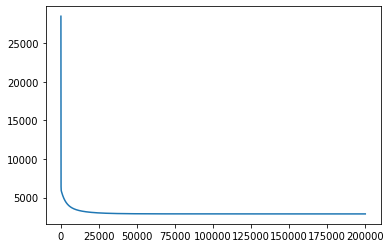

In [22]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [23]:
W, b

(array([  41.95941888, -240.23115197,  557.25037086,  342.58294054,
        -132.51710851, -104.7003705 , -199.68017703,  157.48400208,
         431.37078758,   55.68813994]),
 151.30434843394139)

## 10.  test 데이터에 대한 성능 확인하기

### test 데이터에 대한 성능을 확인해주세요.정의된 손실함수와 기울기 함수로 모델을 학습해주세요.


In [24]:
LL_train = loss(x_train, W, b, y_train)
LL_train

2895.0260888750126

In [25]:
LL = loss(x_test, W, b, y_test)
LL

2884.940959748625

In [26]:
predictions = model(x_test, W, b)

<span style = "color:blue; font-size:100%"> 
<b> MSE 값 확인 </span>

In [27]:
MSE(y_test, predictions )

2884.940959748625

In [28]:
gradient(x_test, W, b, y_test)

(array([ 0.84241202,  0.30772241,  0.49527147,  0.46334734, -0.79157059,
        -0.45658637, -0.5630169 ,  0.130696  , -0.50388176, -0.08873515]),
 -8.235450414190298)

## 11. 정답 데이터와 예측한 데이터 시각화하기

### x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.


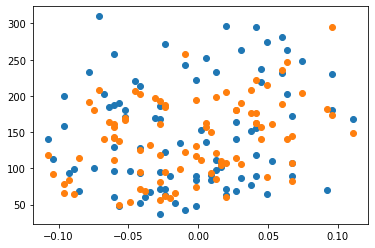

In [30]:
plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:, 0], predictions)
plt.show()